In [1]:
import numpy as np
from pandas import DataFrame
from matplotlib import pyplot

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

from sympy import Symbol
from sympy import Abs
from sympy import diff

from warnings import filterwarnings as message
message(action='ignore')

In [2]:
df=DataFrame({'x':[0.9,4.11,4.82,8.53,8.9],
             'y':[1.91,1.84,4.47,6.38,3.92]})

In [3]:
df

,x,y
0,0.90,1.91
1,4.11,1.84
2,4.82,4.47
3,8.53,6.38
4,8.90,3.92


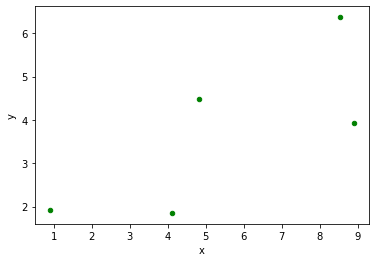

In [4]:
df.plot(x='x',
       y='y',
       kind='scatter',
       color='g')

In [5]:
weights,bias=1,1

In [6]:
df['y_predict']=df['x']*weights+bias

In [7]:
df

,x,y,y_predict
0,0.90,1.91,1.90
1,4.11,1.84,5.11
2,4.82,4.47,5.82
3,8.53,6.38,9.53
4,8.90,3.92,9.90


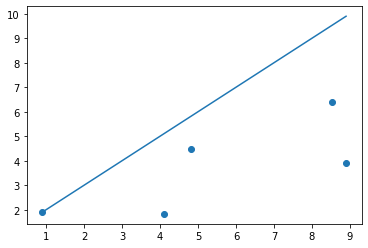

In [8]:
pyplot.scatter(df['x'], df['y'])
pyplot.plot(df['x'],df['y_predict'])

In [9]:
df['error_abs']=np.abs(df['y']-df['y_predict'])

In [10]:
df['error_abs'].mean()

2.7520000000000002

In [11]:
df['weights_update']=(df['x']-df['y_predict'])*np.sign(np.abs(df['y'])-df['y_predict'])

In [12]:
df

,x,y,y_predict,error_abs,weights_update
0,0.90,1.91,1.90,0.01,-1.0
1,4.11,1.84,5.11,3.27,1.0
2,4.82,4.47,5.82,1.35,1.0
3,8.53,6.38,9.53,3.15,1.0
4,8.90,3.92,9.90,5.98,1.0


In [13]:
df['weights_update']

0   -1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: weights_update, dtype: float64

In [14]:
df['weights_update']=df['x']*np.sign(np.abs(df['y'])-df['y_predict'])

In [15]:
df['bias_update']=np.sign(np.abs(df['y'])-df['y_predict'])

In [16]:
df

,x,y,y_predict,error_abs,weights_update,bias_update
0,0.90,1.91,1.90,0.01,0.90,1.0
1,4.11,1.84,5.11,3.27,-4.11,-1.0
2,4.82,4.47,5.82,1.35,-4.82,-1.0
3,8.53,6.38,9.53,3.15,-8.53,-1.0
4,8.90,3.92,9.90,5.98,-8.90,-1.0


In [17]:
df['weights_update'].mean()

-5.0920000000000005

In [18]:
df['bias_update'].mean()

-0.6

In [19]:
df

,x,y,y_predict,error_abs,weights_update,bias_update
0,0.90,1.91,1.90,0.01,0.90,1.0
1,4.11,1.84,5.11,3.27,-4.11,-1.0
2,4.82,4.47,5.82,1.35,-4.82,-1.0
3,8.53,6.38,9.53,3.15,-8.53,-1.0
4,8.90,3.92,9.90,5.98,-8.90,-1.0


In [20]:
df=df[['x','y']].copy()

In [21]:
df

,x,y
0,0.90,1.91
1,4.11,1.84
2,4.82,4.47
3,8.53,6.38
4,8.90,3.92


In [22]:
df

,x,y
0,0.90,1.91
1,4.11,1.84
2,4.82,4.47
3,8.53,6.38
4,8.90,3.92


In [23]:



weights,bias=1,1
df['y_predict']=df['x']*weights+bias

learning_rate=0.01
epochs=range(100)

for epoch in epochs:
    df['weights_update']=df['x']*np.sign(df['y']-df['y_predict'])
    df['bias_update']=np.sign(df['y']-df['y_predict'])    
    
    weights=weights+df['weights_update'].mean()*learning_rate
    bias=bias+df['bias_update'].mean()*learning_rate
    
    df['y_predict']=df['x']*weights+bias
    df['error_in_modul']=np.abs(df['y']-df['y_predict'])
    print(f"this moment error mean -->{df['error_in_modul'].mean()}")
    

this moment error mean -->2.4891153600000004
this moment error mean -->2.22623072
this moment error mean -->1.9633460800000009
this moment error mean -->1.7004614400000009
this moment error mean -->1.4375768000000009
this moment error mean -->1.2381347200000006
this moment error mean -->1.1376257600000006
this moment error mean -->1.0514624
this moment error mean -->1.0504473599999997
this moment error mean -->1.0536102400000011
this moment error mean -->1.0576790399999998
this moment error mean -->1.056664
this moment error mean -->1.0556489599999999
this moment error mean -->1.0546339200000001
this moment error mean -->1.05361888
this moment error mean -->1.0526038399999997
this moment error mean -->1.0515888
this moment error mean -->1.05057376
this moment error mean -->1.0495587199999998
this moment error mean -->1.0485436799999999
this moment error mean -->1.04752864
this moment error mean -->1.0465136000000002
this moment error mean -->1.052061920000002
this moment error mean -->

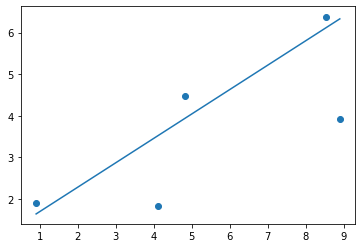

In [24]:
pyplot.scatter(df['x'], df['y'])
pyplot.plot(df['x'],df['y_predict'])

In [25]:
df['y_predict']

0    1.639760
1    3.522104
2    3.938448
3    6.113992
4    6.330960
Name: y_predict, dtype: float64

In [26]:
df['y']

0    1.91
1    1.84
2    4.47
3    6.38
4    3.92
Name: y, dtype: float64

In [27]:
df['y']

0    1.91
1    1.84
2    4.47
3    6.38
4    3.92
Name: y, dtype: float64

In [28]:
linear_regression=LinearRegression()
linear_regression.fit(DataFrame(df['x']), df['y'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
linear_regression.coef_

array([0.4327796])

In [30]:
linear_regression.intercept_

1.3444856051457097

In [31]:
df['l_r_predict']=linear_regression.predict(DataFrame(df['x']))

In [32]:
df

,x,y,y_predict,weights_update,bias_update,error_in_modul,l_r_predict
0,0.90,1.91,1.639760,0.90,1.0,0.270240,1.733987
1,4.11,1.84,3.522104,-4.11,-1.0,1.682104,3.123210
2,4.82,4.47,3.938448,4.82,1.0,0.531552,3.430483
3,8.53,6.38,6.113992,-8.53,-1.0,0.266008,5.036096
4,8.90,3.92,6.330960,-8.90,-1.0,2.410960,5.196224


In [33]:
sgd=SGDRegressor()


In [34]:
sgd.fit(DataFrame(df['x']), df['y'])

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [35]:
sgd.coef_

array([0.52712063])

In [36]:
sgd.intercept_

array([0.69506709])

In [37]:
df['sgd_l_r_predict']=sgd.predict(DataFrame(df['x']))

In [38]:
df

,x,y,y_predict,weights_update,bias_update,error_in_modul,l_r_predict,sgd_l_r_predict
0,0.90,1.91,1.639760,0.90,1.0,0.270240,1.733987,1.169476
1,4.11,1.84,3.522104,-4.11,-1.0,1.682104,3.123210,2.861533
2,4.82,4.47,3.938448,4.82,1.0,0.531552,3.430483,3.235789
3,8.53,6.38,6.113992,-8.53,-1.0,0.266008,5.036096,5.191406
4,8.90,3.92,6.330960,-8.90,-1.0,2.410960,5.196224,5.386441


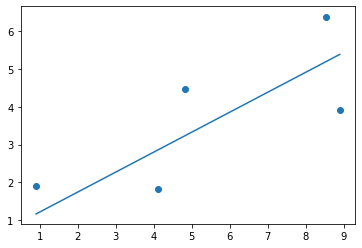

In [39]:
pyplot.scatter(df['x'], df['y'])
pyplot.plot(df['x'],df['sgd_l_r_predict'])

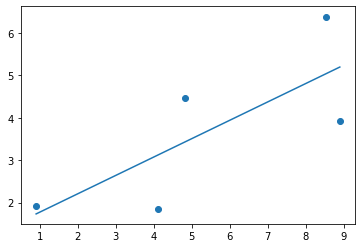

In [40]:
pyplot.scatter(df['x'], df['y'])
pyplot.plot(df['x'],df['l_r_predict'])

In [41]:
y=Symbol('y', real=True)
x=Symbol('x', real=True)
weights=Symbol('weights', real=True)
bias=Symbol('bias', real=True)


In [42]:
Abs(y-x*weights-bias)

Abs(bias + weights*x - y)

In [43]:
diff(Abs(y-x*weights-bias), bias)

sign(bias + weights*x - y)

In [44]:
diff((y-x*weights-bias)**2, bias)

2*bias + 2*weights*x - 2*y